In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
import statistics 
from numpy import trapz
from scipy import stats

In [9]:
#K1=np.random.normal(5,1,1000)
f = open("K3.txt", "r")
K1 = np.zeros(3501)
for i in range(3501):
    K1[i] = f.readline()
    

f.close()
statistics.mean(K1)


0.09483742002285062

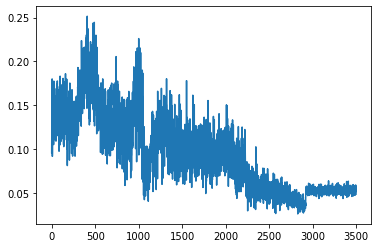

In [10]:
plt.plot(K1)

In [ ]:
numa = len(K1)
alpha_1 = K1
#alpha_2 = K2
#alpha_3 = K3
x_i1 = np.zeros(len(K1));x_i2 = np.zeros(2401);x_i3 = np.zeros(2401)
xm_1 = np.zeros(numa); xm_2 = np.zeros(numa);xm_3 = np.zeros(numa)
x1 = np.linspace(0,1,numa)
x2 = np.linspace(0,1,numa)
x3 = np.linspace(0,1,numa)
stda = np.std(alpha_1)
#stdb = np.std(alpha_2)
#stdc = np.std(alpha_3)
z1 = np.zeros(len(x1))
C1 = (stda/(len(K1)**(1/(3+4))))**2
#C2 = (stdb/(2401**(1/(3+4))))**.9
#C3 = (stdc/(2401**(1/(3+4))))**.9
for loop in range(numa):
    for loop2 in range(len(K1)):
        x_i1[loop2]=x1[loop]-alpha_1[loop2]
        #x_i2[loop2]=x2[loop]-alpha_2[loop2]
        #x_i3[loop2]=x3[loop]-alpha_3[loop2]
    xm_1[loop] = np.mean(np.exp(-.5*(x_i1/C1)**2))*(2*np.pi)**(-1.5)*C1**(-3)/len(K1)
    #xm_2[loop] = np.mean(np.exp(-.5*(x_i2/C2)**2))*(2*np.pi)**(-1.5)*C2**(-3)
    #xm_3[loop] = np.mean(np.exp(-.5*(x_i3/C3)**2))*(2*np.pi)**(-1.5)*C3**(-3)
    

In [ ]:
plt.plot(x1,xm_1)
area=trapz(xm_1,x1,dx=.01)
print(area)
#plt.hist(K1,bins=100,density=True)

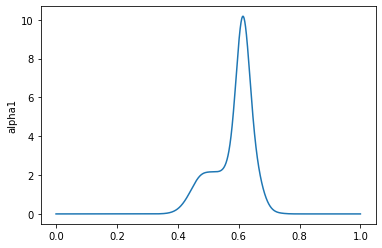

0.6140000000000001

In [3]:
density = gaussian_kde(K1,bw_method=(len(K1)**(-1/7))**1)
xs = np.linspace(0,1,len(K1))
plt.plot(xs,density(xs))
#plt.hist(K1,density=True)
#matplotlib.pyplot.title('marginal distribution of alpha1')
plt.ylabel('alpha1')
#plt.plot(K1,np.exp(-K3))
plt.show()
#statistics.mode(Kth_1)
a = (density(xs))
i = list(a).index(max(density(xs))) 
i
xs[i]

In [ ]:
plt.hist(K1,density=True)

In [4]:
area=trapz(a,xs,dx=.01)
print(area)

0.9999999999999993


In [ ]:
stda

In [ ]:

def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [ ]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

In [ ]:
Z.shape

In [ ]:
positions

In [ ]:
mu=np.array([1,10,20])
# Let's change this so that the points won't all lie in a plane...
sigma=np.matrix([[20,10,10],
                 [10,25,1],
                 [10,1,50]])

data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T

kde = stats.gaussian_kde(values)

# Create a regular 3D grid with 50 points in each dimension
xmin, ymin, zmin = data.min(axis=0)
xmax, ymax, zmax = data.max(axis=0)
xi, yi, zi = np.mgrid[xmin:xmax:50j, ymin:ymax:50j, zmin:zmax:50j]

# Evaluate the KDE on a regular grid...
coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
#x,y,z= values
density = kde(coords).reshape(xi.shape)


In [ ]:
values.shape

In [ ]:
coords.shape